In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#Definition du path

#Université
#path = "C:/Users/pterron/Documents/projet_python/Application_ml/Depot_data/"

#Maison
path = "C:/Users/pierr/Documents/1_projet_python/Valeur_fonciere/Depot_data/"

In [4]:
#head set up
pd.set_option('display.max_columns', None)

#Import de toutes les datas
D = pd.read_csv(filepath_or_buffer= path + "valeursfoncieres-2018.txt", sep="|", decimal=",")


C:\Users\pierr\AppData\Local\Temp\ipykernel_12832\279801475.py:5: DtypeWarning: Columns (14,18,23,24,26,28,32,41) have mixed types. Specify dtype option on import or set low_memory=False.
  D = pd.read_csv(filepath_or_buffer= path + "valeursfoncieres-2018.txt", sep="|", decimal=",")


In [5]:

#Sample
df = D.sample(n = 1000000)

#Visu
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 2132221 to 939262
Data columns (total 43 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Identifiant de document     0 non-null        float64
 1   Reference document          0 non-null        float64
 2   1 Articles CGI              0 non-null        float64
 3   2 Articles CGI              0 non-null        float64
 4   3 Articles CGI              0 non-null        float64
 5   4 Articles CGI              0 non-null        float64
 6   5 Articles CGI              0 non-null        float64
 7   No disposition              1000000 non-null  int64  
 8   Date mutation               1000000 non-null  object 
 9   Nature mutation             1000000 non-null  object 
 10  Valeur fonciere             990384 non-null   float64
 11  No voie                     580427 non-null   float64
 12  B/T/Q                       43328 non-null    object 
 1

Traitement des données

In [6]:
#Valeur manquante
values = df.isna().sum()/len(df)
#Colonne vides
df = df.dropna(axis = 1, how='all')

In [7]:
df.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
2132221,1,27/06/2018,Vente,250000.0,4.0,NaN,RUE,0105,DES ALOUETTES,64000.0,PAU,64,445,NaN,DX,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,93.0,3.0,S,NaN,525.0
169207,1,10/01/2018,Vente,65000.0,NaN,NaN,NaN,B029,LA COLETTE,6640.0,SAINT-JEANNET,6,122,NaN,AR,285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,J,NaN,368.0
2326541,1,05/12/2018,Vente,140000.0,3.0,NaN,CITE,A020,BEL AIR,71100.0,SAINT-REMY,71,475,NaN,AK,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,81.0,5.0,S,NaN,600.0
2143794,2,03/09/2018,Vente,191000.0,NaN,NaN,NaN,B496,TUQUET,64800.0,COARRAZE,64,191,NaN,D,350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,P,NaN,582.0
662154,1,15/10/2018,Vente,158000.0,44.0,NaN,BD,0150,KENNEDY,24750.0,TRELISSAC,24,557,NaN,AW,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,108.0,4.0,S,NaN,830.0


In [8]:
#Colonnes sous un certain pourcentage
perc = len(df)*0.20
#print(perc)
#print(df.isna().sum())
df = df.dropna(axis = 1, thresh=perc)
#df.isna().sum()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 2132221 to 939262
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   No disposition             1000000 non-null  int64  
 1   Date mutation              1000000 non-null  object 
 2   Nature mutation            1000000 non-null  object 
 3   Valeur fonciere            990384 non-null   float64
 4   No voie                    580427 non-null   float64
 5   Type de voie               567254 non-null   object 
 6   Code voie                  990833 non-null   object 
 7   Voie                       990827 non-null   object 
 8   Code postal                990779 non-null   float64
 9   Commune                    1000000 non-null  object 
 10  Code departement           1000000 non-null  object 
 11  Code commune               1000000 non-null  int64  
 12  Section                    999973 non-null   object 
 13  No plan     

In [10]:
#Transtypage

df[['Code commune','Code departement','Code postal']] = df[['Code commune','Code departement','Code postal']].astype(object)

In [11]:
#Supprimer ligne ou valeur cible nulle est null
df = df.dropna(axis =0, subset='Valeur fonciere')

#Type local nul
df = df.dropna(axis =0, subset='Type local')

In [12]:
df['Commune'].describe()

count       546971
unique       25308
top       TOULOUSE
freq          6156
Name: Commune, dtype: object

In [13]:
#Supprimer les doublons pour supprimer les dependances
df['discretisation'] = df['Date mutation'].astype(str) + df['Code voie'].astype(str) + df['Voie'].astype(str) + df['Commune'].astype(str)
df = df.drop_duplicates(subset = 'discretisation', keep=False)
df = df.drop(labels='discretisation', axis = 1)

In [14]:
df.describe(include = 'all')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364088 entries, 2132221 to 939262
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   No disposition             364088 non-null  int64  
 1   Date mutation              364088 non-null  object 
 2   Nature mutation            364088 non-null  object 
 3   Valeur fonciere            364088 non-null  float64
 4   No voie                    354833 non-null  float64
 5   Type de voie               321974 non-null  object 
 6   Code voie                  364088 non-null  object 
 7   Voie                       364087 non-null  object 
 8   Code postal                364060 non-null  object 
 9   Commune                    364088 non-null  object 
 10  Code departement           364088 non-null  object 
 11  Code commune               364088 non-null  object 
 12  Section                    364071 non-null  object 
 13  No plan                    3

In [15]:
#Pourcentage de valeurs nulles
df.isnull().sum()/len(df) *100

No disposition                0.000000
Date mutation                 0.000000
Nature mutation               0.000000
Valeur fonciere               0.000000
No voie                       2.541968
Type de voie                 11.566984
Code voie                     0.000000
Voie                          0.000275
Code postal                   0.007690
Commune                       0.000000
Code departement              0.000000
Code commune                  0.000000
Section                       0.004669
No plan                       0.000000
1er lot                      50.293061
Nombre de lots                0.000000
Code type local               0.000000
Type local                    0.000000
Surface reelle bati           0.144196
Nombre pieces principales     0.144196
Nature culture               50.166993
Surface terrain              50.166993
dtype: float64

'B/T/Q', 'Prefixe de section','No Volume', 'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot','3eme lot','Surface Carrez du 3eme lot','4eme lot','Surface Carrez du 4eme lot','5eme lot'

In [16]:
df.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,1er lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
2132221,1,27/06/2018,Vente,250000.0,4.0,RUE,0105,DES ALOUETTES,64000.0,PAU,64,445,DX,86,NaN,0,1.0,Maison,93.0,3.0,S,525.0
2326541,1,05/12/2018,Vente,140000.0,3.0,CITE,A020,BEL AIR,71100.0,SAINT-REMY,71,475,AK,42,NaN,0,1.0,Maison,81.0,5.0,S,600.0
662154,1,15/10/2018,Vente,158000.0,44.0,BD,0150,KENNEDY,24750.0,TRELISSAC,24,557,AW,43,NaN,0,1.0,Maison,108.0,4.0,S,830.0
1088935,1,28/09/2018,Vente,159000.0,88.0,AV,0115,DE L ISLE,33230.0,GUITRES,33,198,AE,683,NaN,0,1.0,Maison,80.0,4.0,J,667.0
2125252,1,31/10/2018,Vente,61000.0,3.0,MTE,0070,DU LAVOIR,63500.0,LE BROC,63,54,G,1813,NaN,0,1.0,Maison,67.0,4.0,S,562.0


In [17]:
#Feature a garder, trie manuel (Valeurs doublons)

'''
#Surface reeel -> REgarder appartement
#Nature culture -> A virer ?
#Nombre de lots -> Peut-etre pertinent

No disposition                0.000000 -> Ininteressant
Date mutation                 0.000000 -> OK
Nature mutation               0.000000 -> OK
Valeur fonciere               0.000000 -> OK
No voie                       3.213595 -> NOK
Type de voie                 11.744926 -> OK -> Regarder la distrib stat, remplacer par le mode ou autre
Code voie                     0.000000 -> NOK
Voie                          0.000000  -> NOK
Code postal                   0.012081  -> OK -> CAS particulier, droper les lignes
Commune                       0.000000  -> OK
Code departement              0.000000  -> OK
Code commune                  0.000000  -> OK
Section                       0.000000  -> NOK
No plan                       0.000000  -> NOK
1er lot                      48.415351  -> NOK
Nombre de lots                0.000000  -> OK
Code type local               0.000000  -> A regarder
Type local                    0.000000  -> OK
Surface reelle bati           0.128866  -> OK, attention dependance = 0 | A regarder
Nombre pieces principales     0.128866  -> OK, a regarder | stat descriptive | Knn ?
Nature culture               52.013531  -> OK
Surface terrain              52.013531  -> A regarder 

'''


l_corr =['Date mutation', 'Nature mutation', 'Valeur fonciere', 'Code postal','Type de voie', 'Code departement', 'Code commune', 'Type local', 'Surface reelle bati', 'Nature culture', 'Surface terrain','Commune']
df = df[l_corr]
df.head()

,Date mutation,Nature mutation,Valeur fonciere,Code postal,Type de voie,Code departement,Code commune,Type local,Surface reelle bati,Nature culture,Surface terrain,Commune
2132221,27/06/2018,Vente,250000.0,64000.0,RUE,64,445,Maison,93.0,S,525.0,PAU
2326541,05/12/2018,Vente,140000.0,71100.0,CITE,71,475,Maison,81.0,S,600.0,SAINT-REMY
662154,15/10/2018,Vente,158000.0,24750.0,BD,24,557,Maison,108.0,S,830.0,TRELISSAC
1088935,28/09/2018,Vente,159000.0,33230.0,AV,33,198,Maison,80.0,J,667.0,GUITRES
2125252,31/10/2018,Vente,61000.0,63500.0,MTE,63,54,Maison,67.0,S,562.0,LE BROC


In [18]:
df['Type de voie'].describe(include = 'all')
sum(df['Type de voie'].value_counts()[0:3])/len(df['Type de voie'])
df['Type de voie'].value_counts()[0]/len(df['Type de voie'])
#df['Type de voie'].describe(include = 'all')
#sns.displot(df, x='Type de voie')

C:\Users\pierr\AppData\Local\Temp\ipykernel_12832\2467610292.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['Type de voie'].value_counts()[0]/len(df['Type de voie'])


0.5112445342884138

In [19]:
#Pourcentage de valeur manquante
df.isnull().sum()/len(df) *100

Date mutation           0.000000
Nature mutation         0.000000
Valeur fonciere         0.000000
Code postal             0.007690
Type de voie           11.566984
Code departement        0.000000
Code commune            0.000000
Type local              0.000000
Surface reelle bati     0.144196
Nature culture         50.166993
Surface terrain        50.166993
Commune                 0.000000
dtype: float64

In [20]:
#Ligne avant avec code postal nulle
df[df['Code postal'].isnull()]

#On peut droper la colonne Code postal, on a déja l'info par Code departement et code commune

,Date mutation,Nature mutation,Valeur fonciere,Code postal,Type de voie,Code departement,Code commune,Type local,Surface reelle bati,Nature culture,Surface terrain,Commune
854958,13/11/2018,Vente en l'état futur d'achèvement,23000.0,NaN,NaN,2A,4,Dépendance,0.0,NaN,NaN,AJACCIO
2860628,02/05/2018,Vente,132000.0,NaN,CHE,85,96,Maison,70.0,S,499.0,GARNACHE (LA)
2735790,09/05/2018,Vente,100000.0,NaN,AV,83,115,Local industriel. commercial ou assimilé,52.0,NaN,NaN,SAINTE MAXIME
2742238,20/09/2018,Vente,419000.0,NaN,IMP,83,107,Maison,130.0,NaN,NaN,ROQUEBRUNE-SUR-ARGENS
2693167,25/04/2018,Vente,262000.0,NaN,CHE,81,101,Maison,200.0,S,5324.0,LE GARRIC
378398,31/08/2018,Vente,159000.0,NaN,RUE,13,27,Appartement,70.0,NaN,NaN,CHATEAURENARD
341599,12/10/2018,Vente,2700000.0,NaN,TRA,13,212,Maison,100.0,AB,1000.0,MARSEILLE 12EME
854542,22/10/2018,Vente en l'état futur d'achèvement,66000.0,NaN,NaN,2A,4,Dépendance,0.0,NaN,NaN,AJACCIO
377976,01/08/2018,Vente,149700.0,NaN,RUE,13,27,Appartement,70.0,NaN,NaN,CHATEAURENARD
2423172,12/07/2018,Vente,558100.0,NaN,RTE,74,76,Maison,232.0,S,255.0,CHOISY


In [21]:
#Feature a garder, trie manuel (Valeurs doublons)
l_corr =['Date mutation', 'Nature mutation', 'Valeur fonciere', 'Code departement', 'Code commune', 'Type local', 'Surface reelle bati', 'Nature culture', 'Surface terrain','Commune']
df = df[l_corr]
df.head()

,Date mutation,Nature mutation,Valeur fonciere,Code departement,Code commune,Type local,Surface reelle bati,Nature culture,Surface terrain,Commune
2132221,27/06/2018,Vente,250000.0,64,445,Maison,93.0,S,525.0,PAU
2326541,05/12/2018,Vente,140000.0,71,475,Maison,81.0,S,600.0,SAINT-REMY
662154,15/10/2018,Vente,158000.0,24,557,Maison,108.0,S,830.0,TRELISSAC
1088935,28/09/2018,Vente,159000.0,33,198,Maison,80.0,J,667.0,GUITRES
2125252,31/10/2018,Vente,61000.0,63,54,Maison,67.0,S,562.0,LE BROC


Remplacement des valeurs NA

In [22]:
df.describe(include= 'all')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364088 entries, 2132221 to 939262
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date mutation        364088 non-null  object 
 1   Nature mutation      364088 non-null  object 
 2   Valeur fonciere      364088 non-null  float64
 3   Code departement     364088 non-null  object 
 4   Code commune         364088 non-null  object 
 5   Type local           364088 non-null  object 
 6   Surface reelle bati  363563 non-null  float64
 7   Nature culture       181436 non-null  object 
 8   Surface terrain      181436 non-null  float64
 9   Commune              364088 non-null  object 
dtypes: float64(3), object(7)
memory usage: 30.6+ MB


## Traitement des valeurs NA

In [23]:
df.isnull().sum()

Date mutation               0
Nature mutation             0
Valeur fonciere             0
Code departement            0
Code commune                0
Type local                  0
Surface reelle bati       525
Nature culture         182652
Surface terrain        182652
Commune                     0
dtype: int64

Pour surface réel du batiment, on peut partir sur le remplacement par la moyenne pour commencer

In [24]:
#Remplacement valeur nulle par la moyenne
print(df['Surface reelle bati'].mean())
df['Surface reelle bati'] = df['Surface reelle bati'].fillna(value = df['Surface reelle bati'].mean())

89.62806171145029


Pour Nature culture, on peut peut etre utiliser le mode pour le remplacement de la valeur

In [25]:
#Remplacement par le mode
print(df['Nature culture'].mode()[0])
df['Nature culture'] = df['Nature culture'].fillna(value = df['Nature culture'].mode()[0])

S


Pour Surface terrain, on regarde la distribution et les statistiques

In [26]:
#Statistiques
df['Surface terrain'].describe()

count    1.814360e+05
mean     8.434104e+02
std      7.698479e+03
min      0.000000e+00
25%      2.450000e+02
50%      5.000000e+02
75%      8.120000e+02
max      2.960000e+06
Name: Surface terrain, dtype: float64

In [27]:
#Valeur extreme 494048, on cherche a voir combien de valeur on a au dessus d'une limite arbitraire pour lisser la distribution (Pourcentage)
df['Surface terrain'][df['Surface terrain']> 6000].size/df['Surface terrain'].size*100

0.5943618026411197

0.4% de valeur au dessus de 10000, on vire ces valeurs de notre data set

In [28]:
#Supprimer les lignes exotiques 
#df.loc[df['Surface terrain'] > 10000].index
df = df.drop(df.loc[df['Surface terrain'] > 6000].index, axis = 0)

In [29]:
df['Surface terrain'].describe()

count    179272.000000
mean        652.965801
std         700.243161
min           0.000000
25%         241.000000
50%         500.000000
75%         800.000000
max        6000.000000
Name: Surface terrain, dtype: float64

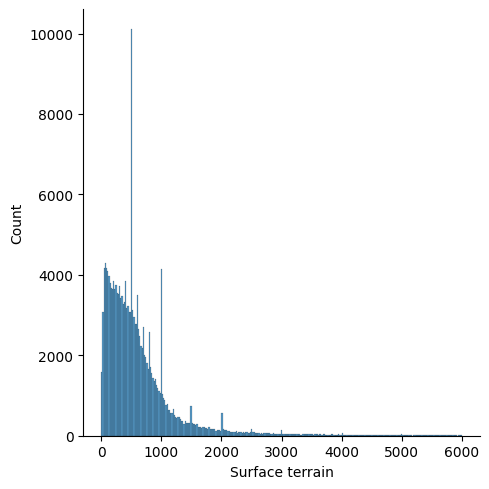

In [30]:
sns.displot(df, x='Surface terrain')

Distribution plus agreable, on peut utiliser la mediane 

In [31]:
#Remplacement des valeurs par la mediane 
df['Surface terrain'] = df['Surface terrain'].fillna(value = df['Surface terrain'].median())

In [32]:
df['Surface terrain'].describe()

count    361924.000000
mean        575.768628
std         498.727440
min           0.000000
25%         500.000000
50%         500.000000
75%         500.000000
max        6000.000000
Name: Surface terrain, dtype: float64

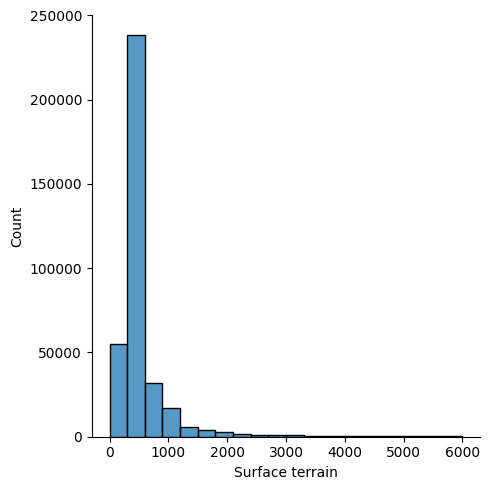

In [33]:
sns.displot(df, x='Surface terrain')

In [34]:
df.isnull().sum()

Date mutation          0
Nature mutation        0
Valeur fonciere        0
Code departement       0
Code commune           0
Type local             0
Surface reelle bati    0
Nature culture         0
Surface terrain        0
Commune                0
dtype: int64

In [35]:
df.head()

,Date mutation,Nature mutation,Valeur fonciere,Code departement,Code commune,Type local,Surface reelle bati,Nature culture,Surface terrain,Commune
2132221,27/06/2018,Vente,250000.0,64,445,Maison,93.0,S,525.0,PAU
2326541,05/12/2018,Vente,140000.0,71,475,Maison,81.0,S,600.0,SAINT-REMY
662154,15/10/2018,Vente,158000.0,24,557,Maison,108.0,S,830.0,TRELISSAC
1088935,28/09/2018,Vente,159000.0,33,198,Maison,80.0,J,667.0,GUITRES
2125252,31/10/2018,Vente,61000.0,63,54,Maison,67.0,S,562.0,LE BROC


## Recuperation de Data open source

### Latitude longitude commune

In [36]:
#Import csv open source (latitude, longitude, prix au m²)
d_comm = pd.read_csv(filepath_or_buffer= path + "communes-departement-region.csv", sep=",", decimal=".")

#Transtypage


#Visu
d_comm.describe(include='all')
d_comm.head(10)

,code_commune_INSEE,nom_commune_postal,code_postal,libelle_acheminement,ligne_5,latitude,longitude,code_commune,article,nom_commune,nom_commune_complet,code_departement,nom_departement,code_region,nom_region
0,1001,L ABERGEMENT CLEMENCIAT,1400,L ABERGEMENT CLEMENCIAT,NaN,46.153426,4.926114,1.0,L',Abergement-Clémenciat,L'Abergement-Clémenciat,1,Ain,84.0,Auvergne-Rhône-Alpes
1,1002,L ABERGEMENT DE VAREY,1640,L ABERGEMENT DE VAREY,NaN,46.009188,5.428017,2.0,L',Abergement-de-Varey,L'Abergement-de-Varey,1,Ain,84.0,Auvergne-Rhône-Alpes
2,1004,AMBERIEU EN BUGEY,1500,AMBERIEU EN BUGEY,NaN,45.960848,5.372926,4.0,NaN,Ambérieu-en-Bugey,Ambérieu-en-Bugey,1,Ain,84.0,Auvergne-Rhône-Alpes
3,1005,AMBERIEUX EN DOMBES,1330,AMBERIEUX EN DOMBES,NaN,45.996180,4.912273,5.0,NaN,Ambérieux-en-Dombes,Ambérieux-en-Dombes,1,Ain,84.0,Auvergne-Rhône-Alpes
4,1006,AMBLEON,1300,AMBLEON,NaN,45.749499,5.594320,6.0,NaN,Ambléon,Ambléon,1,Ain,84.0,Auvergne-Rhône-Alpes
5,1007,AMBRONAY,1500,AMBRONAY,NaN,46.005591,5.357607,7.0,NaN,Ambronay,Ambronay,1,Ain,84.0,Auvergne-Rhône-Alpes
6,1008,AMBUTRIX,1500,AMBUTRIX,NaN,45.936713,5.332809,8.0,NaN,Ambutrix,Ambutrix,1,Ain,84.0,Auvergne-Rhône-Alpes
7,1009,ANDERT ET CONDON,1300,ANDERT ET CONDON,NaN,45.787357,5.657883,9.0,NaN,Andert-et-Condon,Andert-et-Condon,1,Ain,84.0,Auvergne-Rhône-Alpes
8,1010,ANGLEFORT,1350,ANGLEFORT,NaN,45.909372,5.795160,10.0,NaN,Anglefort,Anglefort,1,Ain,84.0,Auvergne-Rhône-Alpes
9,1011,APREMONT,1100,APREMONT,NaN,46.205498,5.657815,11.0,NaN,Apremont,Apremont,1,Ain,84.0,Auvergne-Rhône-Alpes


In [37]:
d_comm.shape

(39201, 15)

In [38]:
d_comm['code_postal'] = d_comm['code_postal'].astype(int)
d_comm.code_commune_INSEE.value_counts()

code_commune_INSEE
14371    22
14061    21
98729    20
76618    18
98719    17
         ..
32142     1
32141     1
32140     1
32139     1
99138     1
Name: count, Length: 36013, dtype: int64

In [39]:
#Suppression des doublons
#Code postal
d_comm = d_comm.drop_duplicates(subset=['code_postal'])
#Meme code commune
d_comm = d_comm.drop_duplicates(subset=['code_commune_INSEE'])

#Sans latitude ou longitude
d_comm = d_comm.dropna(axis =0, subset='latitude')


d_comm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6051 entries, 0 to 38935
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_commune_INSEE    6051 non-null   object 
 1   nom_commune_postal    6051 non-null   object 
 2   code_postal           6051 non-null   int32  
 3   libelle_acheminement  6051 non-null   object 
 4   ligne_5               64 non-null     object 
 5   latitude              6051 non-null   float64
 6   longitude             6051 non-null   float64
 7   code_commune          6051 non-null   float64
 8   article               509 non-null    object 
 9   nom_commune           6051 non-null   object 
 10  nom_commune_complet   6051 non-null   object 
 11  code_departement      6051 non-null   object 
 12  nom_departement       6051 non-null   object 
 13  code_region           6051 non-null   float64
 14  nom_region            6051 non-null   object 
dtypes: float64(4), int32(1), 

In [40]:
d_fil = d_comm.loc[d_comm['code_commune'] == 53]
d_fil

,code_commune_INSEE,nom_commune_postal,code_postal,libelle_acheminement,ligne_5,latitude,longitude,code_commune,article,nom_commune,nom_commune_complet,code_departement,nom_departement,code_region,nom_region
54,1053,BOURG EN BRESSE,1000,BOURG EN BRESSE,NaN,46.205152,5.246021,53.0,NaN,Bourg-en-Bresse,Bourg-en-Bresse,1,Ain,84.0,Auvergne-Rhône-Alpes
509,2053,VALLEES EN CHAMPAGNE,2330,VALLEES EN CHAMPAGNE,BAULNE EN BRIE,48.989692,3.604867,53.0,NaN,Vallées en Champagne,Vallées en Champagne,2,Aisne,32.0,Hauts-de-France
2278,7053,CHANDOLAS,7230,CHANDOLAS,NaN,44.413637,4.243311,53.0,NaN,Chandolas,Chandolas,7,Ardèche,84.0,Auvergne-Rhône-Alpes
2629,8053,BAZEILLES,8140,BAZEILLES,NaN,49.677434,4.985155,53.0,NaN,Bazeilles,Bazeilles,8,Ardennes,44.0,Grand Est
3484,10053,BOURANTON,10270,BOURANTON,NaN,48.314930,4.180494,53.0,NaN,Bouranton,Bouranton,10,Aube,44.0,Grand Est
4748,13053,MALLEMORT,13370,MALLEMORT,NaN,43.728583,5.182977,53.0,NaN,Mallemort,Mallemort,13,Bouches-du-Rhône,93.0,Provence-Alpes-Côte d'Azur
6367,17053,BORDS,17430,BORDS,NaN,45.895376,-0.785050,53.0,NaN,Bords,Bords,17,Charente-Maritime,75.0,Nouvelle-Aquitaine
8875,24053,BOULAZAC ISLE MANOIRE,24750,BOULAZAC ISLE MANOIRE,NaN,45.173773,0.769369,53.0,NaN,Boulazac Isle Manoire,Boulazac Isle Manoire,24,Dordogne,75.0,Nouvelle-Aquitaine
9446,25053,BELVOIR,25430,BELVOIR,NaN,47.320451,6.616743,53.0,NaN,Belvoir,Belvoir,25,Doubs,27.0,Bourgogne-Franche-Comté
11602,29053,LE FAOU,29590,LE FAOU,NaN,48.305933,-4.142149,53.0,Le,Faou,Le Faou,29,Finistère,53.0,Bretagne


In [41]:
d_comm.shape

(6051, 15)

In [42]:
#Liste des colonnes à garder
list_var = ['code_commune_INSEE','latitude','longitude','nom_commune']
d_lat = d_comm[list_var]
d_lat.head()

,code_commune_INSEE,latitude,longitude,nom_commune
0,1001,46.153426,4.926114,Abergement-Clémenciat
1,1002,46.009188,5.428017,Abergement-de-Varey
2,1004,45.960848,5.372926,Ambérieu-en-Bugey
3,1005,45.996180,4.912273,Ambérieux-en-Dombes
4,1006,45.749499,5.594320,Ambléon


In [43]:
d_comm.loc[d_comm['code_commune_INSEE'] == '5061']

,code_commune_INSEE,nom_commune_postal,code_postal,libelle_acheminement,ligne_5,latitude,longitude,code_commune,article,nom_commune,nom_commune_complet,code_departement,nom_departement,code_region,nom_region


### Prix au metre carré ATTENTION, BASE SUR PEU DE VENTE, PEUT ETRE PAS PERTINENT

In [44]:
#Import csv open source (latitude, longitude, prix au m²)
#d_prix_mcarré = pd.read_csv(filepath_or_buffer= path + "dvf-communes-2019.csv", sep=";")

#Transtypage

#Visu
#d_prix_mcarré.describe(include='all')

In [45]:
#d_prix_mcarré.INSEE_COM.value_counts()

In [46]:
#d_filter = d_prix_mcarré.loc[d_prix_mcarré['INSEE_DEP'] == '62']
#d_filter

ATTENTION AUX NOMBRES DE VENTES, IMPACT SUR LE PRIX MOYEN

In [47]:
l_drop = ['INSEE_COM','INSEE_REG', 'NOM_COM_M', 'PrixMoyen_M2']
#d_prix_mcarré.drop()

### Fusion des dataset

In [48]:
#Ajout des prix au mcarré pour les communes
#merged_df = pd.merge(df, d_comm, on='', how='inner')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361924 entries, 2132221 to 939262
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date mutation        361924 non-null  object 
 1   Nature mutation      361924 non-null  object 
 2   Valeur fonciere      361924 non-null  float64
 3   Code departement     361924 non-null  object 
 4   Code commune         361924 non-null  object 
 5   Type local           361924 non-null  object 
 6   Surface reelle bati  361924 non-null  float64
 7   Nature culture       361924 non-null  object 
 8   Surface terrain      361924 non-null  float64
 9   Commune              361924 non-null  object 
dtypes: float64(3), object(7)
memory usage: 38.4+ MB


In [50]:
#Creation de variable pour la fusion (Code insee)

def f(x,y):
    return x + y.zfill(3)

df['code_commune_INSEE'] = df['Code departement'].astype(str) + df['Code commune'].astype(str).str.zfill(3)

df['code_commune_INSEE'].value_counts()

code_commune_INSEE
31555    3815
6088     3275
44109    2540
34172    2394
33063    2170
         ... 
31034       1
80681       1
39081       1
61323       1
50172       1
Name: count, Length: 25655, dtype: int64

In [51]:
#Merged
merged_df = pd.merge(df, d_lat, on = 'code_commune_INSEE', how='left')
merged_df

,Date mutation,Nature mutation,Valeur fonciere,Code departement,Code commune,Type local,Surface reelle bati,Nature culture,Surface terrain,Commune,code_commune_INSEE,latitude,longitude,nom_commune
0,27/06/2018,Vente,250000.0,64,445,Maison,93.0,S,525.0,PAU,64445,43.320019,-0.350338,Pau
1,05/12/2018,Vente,140000.0,71,475,Maison,81.0,S,600.0,SAINT-REMY,71475,NaN,NaN,NaN
2,15/10/2018,Vente,158000.0,24,557,Maison,108.0,S,830.0,TRELISSAC,24557,NaN,NaN,NaN
3,28/09/2018,Vente,159000.0,33,198,Maison,80.0,J,667.0,GUITRES,33198,NaN,NaN,NaN
4,31/10/2018,Vente,61000.0,63,54,Maison,67.0,S,562.0,LE BROC,63054,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361919,05/09/2018,Vente,105000.0,50,172,Maison,105.0,S,42.0,EMONDEVILLE,50172,NaN,NaN,NaN
361920,28/12/2018,Vente,199200.0,63,291,Maison,109.0,S,588.0,PUY-GUILLAUME,63291,NaN,NaN,NaN
361921,02/03/2018,Vente,375238.0,92,63,Appartement,77.0,S,500.0,RUEIL-MALMAISON,92063,48.869190,2.177341,Rueil-Malmaison
361922,04/06/2018,Vente,128650.0,25,388,Maison,115.0,S,420.0,MONTBELIARD,25388,NaN,NaN,NaN


In [52]:
#Stat merged df
merged_df.isnull().sum()/len(merged_df) *100

Date mutation           0.00000
Nature mutation         0.00000
Valeur fonciere         0.00000
Code departement        0.00000
Code commune            0.00000
Type local              0.00000
Surface reelle bati     0.00000
Nature culture          0.00000
Surface terrain         0.00000
Commune                 0.00000
code_commune_INSEE      0.00000
latitude               39.77907
longitude              39.77907
nom_commune            39.77907
dtype: float64

## Cartography

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
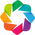

In [53]:
import geoviews as gv
import geoviews.feature as gf
import xarray as xr
from cartopy import crs

gv.extension('bokeh')

In [54]:
df.head()

,Date mutation,Nature mutation,Valeur fonciere,Code departement,Code commune,Type local,Surface reelle bati,Nature culture,Surface terrain,Commune,code_commune_INSEE
2132221,27/06/2018,Vente,250000.0,64,445,Maison,93.0,S,525.0,PAU,64445
2326541,05/12/2018,Vente,140000.0,71,475,Maison,81.0,S,600.0,SAINT-REMY,71475
662154,15/10/2018,Vente,158000.0,24,557,Maison,108.0,S,830.0,TRELISSAC,24557
1088935,28/09/2018,Vente,159000.0,33,198,Maison,80.0,J,667.0,GUITRES,33198
2125252,31/10/2018,Vente,61000.0,63,54,Maison,67.0,S,562.0,LE BROC,63054


In [55]:
#Creation des valeurs de moyennes par departement
val_moy_com = pd.pivot_table(data = df, values = 'Valeur fonciere',index = 'Code departement',aggfunc='mean')
print(val_moy_com.sort_values(by = 'Valeur fonciere'))
val_moy_com.loc[57] = val_moy_com.mean()
val_moy_com.loc[67] = val_moy_com.mean()
val_moy_com.loc[68] = val_moy_com.mean()
val_moy_com = val_moy_com.astype(int)



                  Valeur fonciere
Code departement                 
23                   76715.405097
58                   85485.235142
36                   87101.158246
52                   89144.142535
55                   99462.708886
...                           ...
59                  314594.878971
94                  339055.522311
78                  353662.287606
92                  494818.586728
75                  877984.708540

[99 rows x 1 columns]


In [56]:
val_moy_com.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 1 to 68
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Valeur fonciere  102 non-null    int32
dtypes: int32(1)
memory usage: 1.2+ KB


In [57]:
val_moy_com.loc[30][0]

C:\Users\pierr\AppData\Local\Temp\ipykernel_12832\1159762198.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val_moy_com.loc[30][0]


187348

In [58]:
import geopandas as gpd
import geoviews as gv

In [59]:
sf = gpd.read_file(path + "departements-version-simplifiee.geojson")
sf['valeur'] = 0
sf

,code,nom,geometry,valeur
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...",0
1,02,Aisne,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, ...",0
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.04907 46.75808, ...",0
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.69209 44.18648, ...",0
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.29922 45.10855, ...",0
...,...,...,...,...
91,91,Essonne,"POLYGON ((2.22656 48.77610, 2.23298 48.76620, ...",0
92,92,Hauts-de-Seine,"POLYGON ((2.29097 48.95097, 2.32697 48.94536, ...",0
93,93,Seine-Saint-Denis,"POLYGON ((2.55306 49.00982, 2.58031 48.99159, ...",0
94,94,Val-de-Marne,"POLYGON ((2.33190 48.81701, 2.36395 48.81632, ...",0


In [60]:
#Ajout des valeurs de prix moyen dans un departement
for index, row in sf.iterrows() :
    #print(row[0])
    if((row[0] == '2A') or (row[0] == '2B')):
        #print(row[0])
        sf['valeur'][index] = val_moy_com.loc[row[0]][0]
    else :
        sf['valeur'][index] = val_moy_com.loc[int(row[0])][0]
        #print(row[0])
#sf['value'b

C:\Users\pierr\AppData\Local\Temp\ipykernel_12832\395043377.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if((row[0] == '2A') or (row[0] == '2B')):
C:\Users\pierr\AppData\Local\Temp\ipykernel_12832\395043377.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sf['valeur'][index] = val_moy_com.loc[int(row[0])][0]
C:\Users\pierr\AppData\Local\Temp\ipykernel_12832\395043377.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf['v

In [61]:
sf.loc[42]

code                                                       42
nom                                                     Loire
geometry    POLYGON ((3.8995333931893303 46.27590543921817...
valeur                                                 155692
Name: 42, dtype: object

In [62]:
deps = gv.Polygons(sf, vdims=['valeur','nom'])

In [63]:
from geoviews import dim
deps.opts(width=600, height=600, toolbar='above',
          colorbar=True, tools=['hover'], aspect='equal')

:Polygons   [Longitude,Latitude]   (valeur,nom)

# Machine learning

In [92]:
#Test sur le csv concat
dff = pd.read_csv(filepath_or_buffer= path + "concat.csv", sep="|", decimal=",")

C:\Users\pierr\AppData\Local\Temp\ipykernel_12832\2441892334.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  dff = pd.read_csv(filepath_or_buffer= path + "concat.csv", sep="|", decimal=",")


In [93]:
dff.isna().sum()/len(dff) *100

Date mutation                0.0
Nature mutation              0.0
Valeur fonciere              0.0
Type de voie                 0.0
Code postal                  0.0
Commune                      0.0
Code departement             0.0
Code commune                 0.0
Nombre de lots               0.0
Code type local              0.0
Type local                   0.0
Surface reelle bati          0.0
Nombre pieces principales    0.0
Nature culture               0.0
Surface terrain              0.0
dtype: float64

In [66]:
dff = dff.dropna(axis =0, subset=['Valeur fonciere','Surface reelle bati','Nombre pieces principales'])

In [67]:
#Remplacement des surface terrain par 0 pour le sappartements, et on vire les autres lignes valeurs vide
dff['Surface terrain'].loc[dff['Surface terrain'].isna() & (dff['Type local'] == 'Appartement')] = 0
dff = dff.dropna(axis = 0, subset='Surface terrain')

C:\Users\pierr\AppData\Local\Temp\ipykernel_12832\1461740602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Surface terrain'].loc[dff['Surface terrain'].isna() & (dff['Type local'] == 'Appartement')] = 0


In [68]:
#Type de voie
dff['Type de voie'] = dff['Type de voie'].fillna(value = dff['Type de voie'].mode()[0])

In [69]:
#Recode
#Binarisation (Si S alors 1, sinon 0)
def recode(x):
    if x =='S':
        return 1
    else :
        return 0

dff['Nature culture'] = dff['Nature culture'].map(recode)

In [70]:
dff.isna().sum()/len(dff) *100
#dff.info()

Date mutation                0.0
Nature mutation              0.0
Valeur fonciere              0.0
Type de voie                 0.0
Code postal                  0.0
Commune                      0.0
Code departement             0.0
Code commune                 0.0
Nombre de lots               0.0
Code type local              0.0
Type local                   0.0
Surface reelle bati          0.0
Nombre pieces principales    0.0
Nature culture               0.0
Surface terrain              0.0
dtype: float64

### Echantillonage

In [71]:
Y = dff['Valeur fonciere']
X = dff[['Surface terrain', 'Surface reelle bati']] 

print(X.shape)
print(Y.shape)


(2243664, 2)
(2243664,)


In [72]:
from sklearn.model_selection import train_test_split
#70% des données pour l’apprentissage
#30% des données pour l'échantillon test
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    random_state = 42)

In [73]:
type(X_train)

pandas.core.frame.DataFrame

### Regression linéaire

In [74]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [75]:
#Coefficient du modèle
coef = pd.DataFrame(reg.coef_, index= X_train.columns, columns=['Coef'])
coef.loc['Constante'] = reg.intercept_
coef

,Coef
Surface terrain,18.974029
Surface reelle bati,443.274632
Constante,173037.511765


In [76]:
y_pred = reg.predict(X_test)
y_pred

array([ 217865.47612669,  190768.49703647, 1469938.02074042, ...,
        196919.67060031,  225180.63295384,  204764.15389462])

In [77]:
#RMSE comme métrique
from sklearn.metrics import mean_squared_error, r2_score
print("RMSE : " + str(mean_squared_error(y_test, y_pred, squared= True)))
print("R² : " + str(r2_score(y_test, y_pred)))

RMSE : 2989183346463.5786
R² : 0.02569034740039411


## arbre de decision

In [78]:
Y = dff['Type local']
X = dff[['Type de voie','Surface reelle bati','Surface terrain']] 

#Traitement des Type de voie
X = pd.get_dummies(data=X, columns=['Type de voie'])


from sklearn.model_selection import train_test_split
#70% des données pour l’apprentissage
#30% des données pour l'échantillon test
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    random_state = 42)


In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [80]:
treemod = DecisionTreeClassifier(max_depth=3 , min_samples_leaf=10, min_samples_split=20)
treemod = treemod.fit(X_train,y_train)

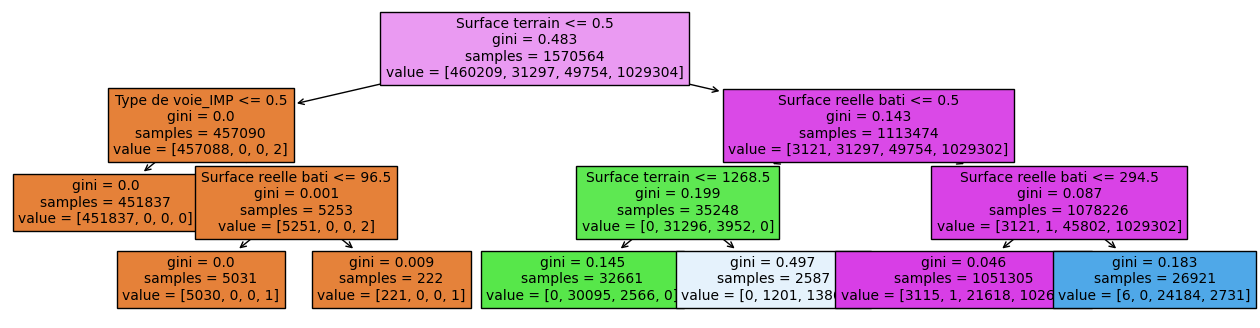

In [81]:
plt.figure(figsize=(16,4))
plot_tree(treemod,feature_names = list(X.columns),filled=True, fontsize=10)
plt.show()

In [82]:
y_pred = treemod.predict(X_test)
y_pred

array(['Maison', 'Appartement',
       'Local industriel. commercial ou assimilé', ..., 'Maison',
       'Maison', 'Maison'], dtype=object)

In [83]:
from sklearn.metrics import confusion_matrix
mc = pd.DataFrame(confusion_matrix(y_test,y_pred),
                  columns=['pred_0','pred_1','pred_2','pred_3'],
                  index=['obs_0','obs_1','obs_2','obs_3'])

mc

,pred_0,pred_1,pred_2,pred_3
obs_0,195874,0,1,1352
obs_1,0,12926,527,0
obs_2,0,1107,10800,9335
obs_3,2,0,1140,440036


In [84]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9799970286733026


In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [97]:
#Random forest

#module
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#données de test
Y = dff['Valeur fonciere']
X = dff[['Code commune','Type local','Surface reelle bati','Surface terrain']] 

#pretraitement
X = pd.get_dummies(data=X, columns=['Type local'])

#Echantillonage
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    random_state = 42)

#modèle
reg = RandomForestRegressor(n_estimators = 10)

#entrainement
reg.fit(X_train, y_train)

#fit
y_pred = reg.predict(X_test)

#prediction
mse = mean_squared_error(y_test, y_pred= y_pred)
r2 = r2_score(y_test, y_pred)

#print
print("RMSE : " + str(mse))
print("R² : " + str(r2))


RMSE : 3206722088008.4014
R² : -0.04521533857977289


In [95]:
print("RMSE : " + str(mse))
print("R² : " + str(r2))

RMSE : 3739159144352.361
R² : -0.21876058598367298


In [98]:


#module
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

#données de test
Y = dff['Valeur fonciere']
X = dff[['Code commune','Type local','Surface reelle bati','Surface terrain']] 

#pretraitement
X = pd.get_dummies(data=X, columns=['Type local'])

#Echantillonage
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    random_state = 42)



param_grid = {'n_estimators': [100, 200],  # Number of decision trees in the forest
              'max_depth': [10, 20, 30],  # Maximum depth of each tree
              'min_samples_split': [50, 100],  # Minimum samples required to split an internal node
              'min_samples_leaf': [10, 20, 40],  # Minimum samples required to be a leaf node
}

reg = RandomForestRegressor()
reg_model_1 = GridSearchCV(reg, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv=5)
reg_model_1.fit(X_train, y_train)

print("Voici les paramètres du meilleure modèle : " + str(reg_model_1.best_estimator_))
print("Voici le score "  + str(reg_model_1.scorer_) + " du meilleure modèle : " + str(reg_model_1.best_score_))

: 

### Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [ ]:
parameters = {'max_depth' : [1,2,3,4] ,
              'min_samples_leaf' : [20,30,40],
              'min_samples_split' : [50,100,200]}

dtc = DecisionTreeClassifier()
#dtc_model_1 = GridSearchCV(dtc, parameters, scoring = 'accuracy')
#dtc_model_1.fit(X_train, y_train)

print("Voici les paramètres du meilleure modèle : " + str(dtc_model_1.best_estimator_))
print("Voici le score "  + str(dtc_model_1.scorer_) + " du meilleure modèle : " + str(dtc_model_1.best_score_))

NameError: name 'dtc_model_1' is not defined

# DASH

In [ ]:
#Import Packages
from dash import Dash, html, dash_table, dcc, callback, Output, Input
import pandas as pd
import plotly.express as px

#Incorporate data

#Initialize the app - incorporate css
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = Dash(__name__, external_stylesheets=external_stylesheets)

#App layout
app.layout = html.Div([
    html.Div(className='row', children = 'My first app with Data & Gaphe', 
             style = {'textAlign': 'center', 'color': 'white', 'fontSize': 30}),
    
    html.Div(className='row', children =[
        dcc.RadioItems( options=['Code postal', 'Nature mutation', 'Surface terrain'],
                       value='Code postal',
                       inline=True,
                       id='controls-and-radio-item')],
                       style = {'color': 'white', 'fontSize': 20}),

    html.Div(className='row', children =[
        html.Div(className='six columns', children=[
            dash_table.DataTable(data=df.to_dict('records'), page_size=11, style_table={'overflowX': 'auto'})
        ]),
        html.Div(className='six columns', children=[
            dcc.Graph(figure = {}, id='controls-and-graph')
        ])
    ])     
])

# Add controls to build the interaction
@callback(
    Output(component_id='controls-and-graph', component_property='figure'),
    Input(component_id='controls-and-radio-item', component_property='value')
)
def update_graph(col_chosen):
    fig = px.histogram(df, x=col_chosen, y='Valeur fonciere', histfunc='avg')
    return fig


#Run the app
if __name__ == '__main__':
    app.run(debug = True)

ModuleNotFoundError: No module named 'dash'